In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd



Построение таймлайнов

In [6]:
import os
import os.path
import re

rootdir ='./'


# FIX LEGENDS POSITIONS FUNCTION
def fixLegend(ax):   
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='upper left').get_frame().set_facecolor('white')   
    
fixLegends = np.vectorize(fixLegend)

for subdir, dirs, files in os.walk(rootdir):
    for file in files:        
        if(file == "timeline.csv"):
            data = pd.read_csv(os.path.join(subdir, file), index_col="time")
            axes = data.plot(subplots=True, title=os.path.join(subdir, file), figsize=(8.3, 5.8), grid=True)            
            
            fixLegends(axes)
            plt.tight_layout(pad=5, w_pad=0.5, h_pad=0.5)            
            
            r = re.match(r'\./(.+)\\(.+)',subdir)
            testname = r.group(2)
            pname = r.group(1)
            directory = "figures/" + testname  + "/"
            
            if not os.path.exists(directory):
                os.makedirs(directory)
            
            plotpath = os.path.join(directory, pname + file + '.png')
            print(plotpath)
            plt.savefig(plotpath)
            plt.tight_layout()
            plt.close()
        

figures/memorystress_v0.1/10-25-05-16timeline.csv.png
figures/memory_v0.1/10-25-05-16timeline.csv.png
figures/operation_v0.1/10-25-05-16timeline.csv.png
figures/reaction_v0.1/10-25-05-16timeline.csv.png
figures/memorystress_v0.1/15-25-05-16timeline.csv.png
figures/memory_v0.1/15-25-05-16timeline.csv.png
figures/operation_v0.1/15-25-05-16timeline.csv.png
figures/plasticity_v0.1/15-25-05-16timeline.csv.png
figures/reaction_v0.1/15-25-05-16timeline.csv.png
figures/reaction_v0.1/2-23-05-16timeline.csv.png
figures/reaction_v0.1/20-26-05-16timeline.csv.png
figures/reaction_v0.1/21-26-05-16timeline.csv.png
figures/memorystress_v0.1/22-26-05-16timeline.csv.png
figures/memory_v0.1/22-26-05-16timeline.csv.png
figures/operation_v0.1/22-26-05-16timeline.csv.png
figures/plasticity_v0.1/22-26-05-16timeline.csv.png
figures/reaction_v0.1/22-26-05-16timeline.csv.png
figures/memorystress_v0.1/3-23-05-16timeline.csv.png
figures/memory_v0.1/3-23-05-16timeline.csv.png
figures/operation_v0.1/3-23-05-16timel

In [10]:
import seaborn as sns
sns.set()

## Анализ результатов

In [7]:
results  = pd.read_csv("valid_results_predicted.csv", index_col=0)
results = results.dropna()
results.head()

,FolderName,Name,Age,ReadingF0Mean,ReadingF0Std,ReadingJitter,ReadingShimmer,ReadingHFEnergy,M1,M2,...,MemoryAverageResponseTime,MemoryRemembered,MemoryScore,MemoryStressTime,MemoryStressAverageResponseTime,MemoryStressCorrectCount,MemoryStressWrongCount,MemoryStressScore,ReadingClass,ReadingClassName
Id,,,,,,,,,,,,,,,,,,,,,
3,3-23-05-16,Максим,21,129.119836,50.177899,0.090566,0.212579,-145.354909,-140.255719,6.973520,...,2759.222222,18,85,61022,1216.814815,23,4,117,3,радость
7,7-24-05-16,Максим,21,120.884774,40.923472,0.089282,0.184317,-131.708895,-124.838613,8.190024,...,3361.000000,16,74,61018,1102.785714,23,5,115,3,радость
10,10-25-05-16,Евгений,23,113.334667,30.928611,0.061969,0.164867,-127.579916,-119.092917,7.262545,...,2270.166667,12,60,61028,1743.136364,17,5,85,4,страх
15,15-25-05-16,Анастасия,21,122.267913,23.525760,0.035018,0.118905,-143.526680,-131.724500,3.608049,...,3034.500000,18,85,61037,1880.904762,18,3,94,0,нейтраль
22,22-26-05-16,Денис,21,127.320155,70.626162,0.128426,0.140907,-122.512743,-109.660360,1.903812,...,2140.875000,16,78,61014,979.400000,26,4,134,3,радость


In [8]:
corr = results.corr()
corr

,Age,ReadingF0Mean,ReadingF0Std,ReadingJitter,ReadingShimmer,ReadingHFEnergy,M1,M2,M3,M4,...,MemoryTime,MemoryAverageResponseTime,MemoryRemembered,MemoryScore,MemoryStressTime,MemoryStressAverageResponseTime,MemoryStressCorrectCount,MemoryStressWrongCount,MemoryStressScore,ReadingClass
Age,1.000000,0.080981,-0.005347,0.112067,-0.010744,-0.299854,-0.258425,0.118537,0.204219,0.052065,...,0.601769,0.077413,0.254775,2.293659e-01,0.356638,0.416690,-0.297121,-1.925162e-01,-0.286728,0.176872
ReadingF0Mean,0.080981,1.000000,0.787414,0.604663,0.148174,0.163284,0.133173,0.274700,-0.206962,-0.197572,...,-0.204455,-0.136765,-0.257716,-2.076113e-01,0.222819,-0.113709,0.104156,-3.347096e-01,0.134756,-0.164063
ReadingF0Std,-0.005347,0.787414,1.000000,0.835747,0.316512,0.190562,0.212294,0.366389,-0.294584,-0.274565,...,-0.273564,-0.085645,-0.341079,-2.850849e-01,0.193576,-0.056552,0.092684,-1.662576e-01,0.109305,-0.240412
ReadingJitter,0.112067,0.604663,0.835747,1.000000,0.385212,0.176577,0.249484,0.307689,-0.193485,-0.156197,...,-0.045986,0.053884,-0.311076,-2.966933e-01,0.011442,-0.065698,0.110137,-1.775048e-01,0.122900,-0.216970
ReadingShimmer,-0.010744,0.148174,0.316512,0.385212,1.000000,-0.062137,0.015847,0.100989,0.120465,-0.323667,...,-0.155836,0.103217,-0.378774,-3.781482e-01,-0.069210,-0.064508,0.033638,1.619539e-01,0.021525,0.089517
ReadingHFEnergy,-0.299854,0.163284,0.190562,0.176577,-0.062137,1.000000,0.924266,0.482105,-0.044942,0.225761,...,-0.164165,-0.010454,-0.177989,-1.805099e-01,0.118512,-0.624427,0.498389,9.897615e-02,0.497841,0.084319
M1,-0.258425,0.133173,0.212294,0.249484,0.015847,0.924266,1.000000,0.342766,-0.057865,0.194182,...,-0.125816,0.129243,-0.300915,-3.184693e-01,0.138640,-0.542840,0.423780,4.811502e-02,0.428115,0.129108
M2,0.118537,0.274700,0.366389,0.307689,0.100989,0.482105,0.342766,1.000000,-0.360507,0.076121,...,-0.035878,0.038450,-0.156816,-1.359070e-01,0.081278,0.041048,-0.125436,-1.732187e-02,-0.115935,-0.096771
M3,0.204219,-0.206962,-0.294584,-0.193485,0.120465,-0.044942,-0.057865,-0.360507,1.000000,-0.178925,...,0.092768,0.244015,-0.158476,-2.044334e-01,0.263325,-0.095672,0.094745,4.706962e-01,0.061812,0.572510
M4,0.052065,-0.197572,-0.274565,-0.156197,-0.323667,0.225761,0.194182,0.076121,-0.178925,1.000000,...,0.106608,0.058913,0.090290,6.784400e-02,-0.053648,-0.108275,0.134305,-1.006993e-01,0.134637,-0.228268


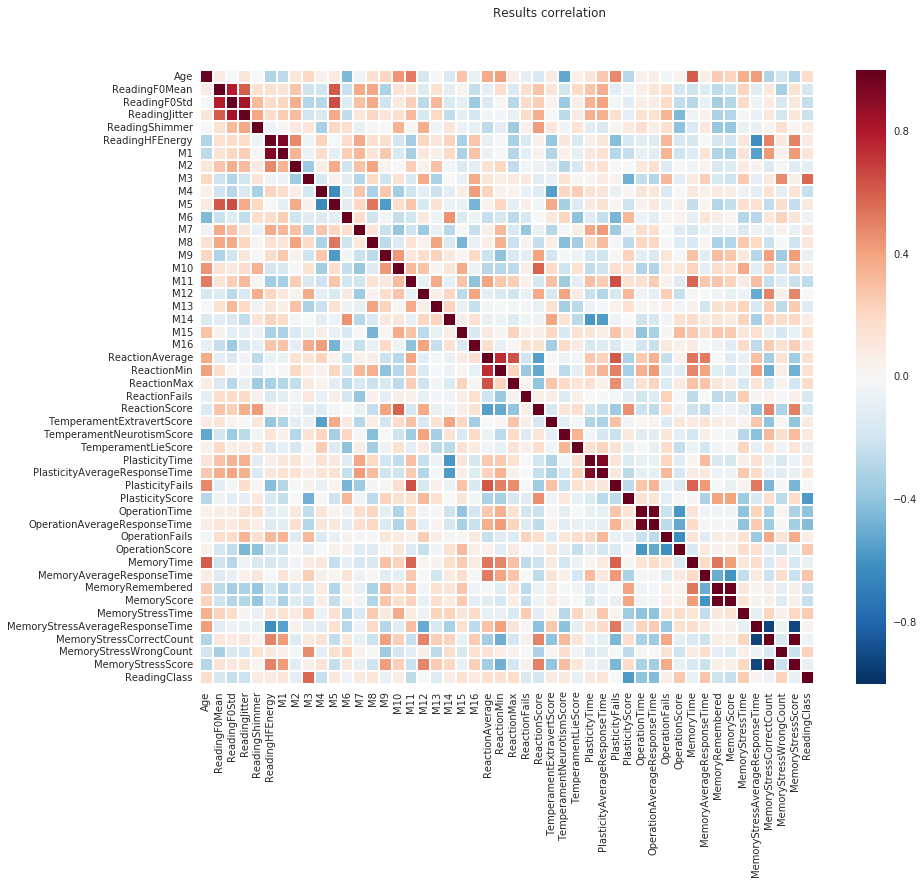

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,11))

sns.heatmap(corr, ax=ax, square=True, linewidths=1)
plt.gcf().suptitle('Results correlation')
plt.savefig('figures/results_correlation.png')

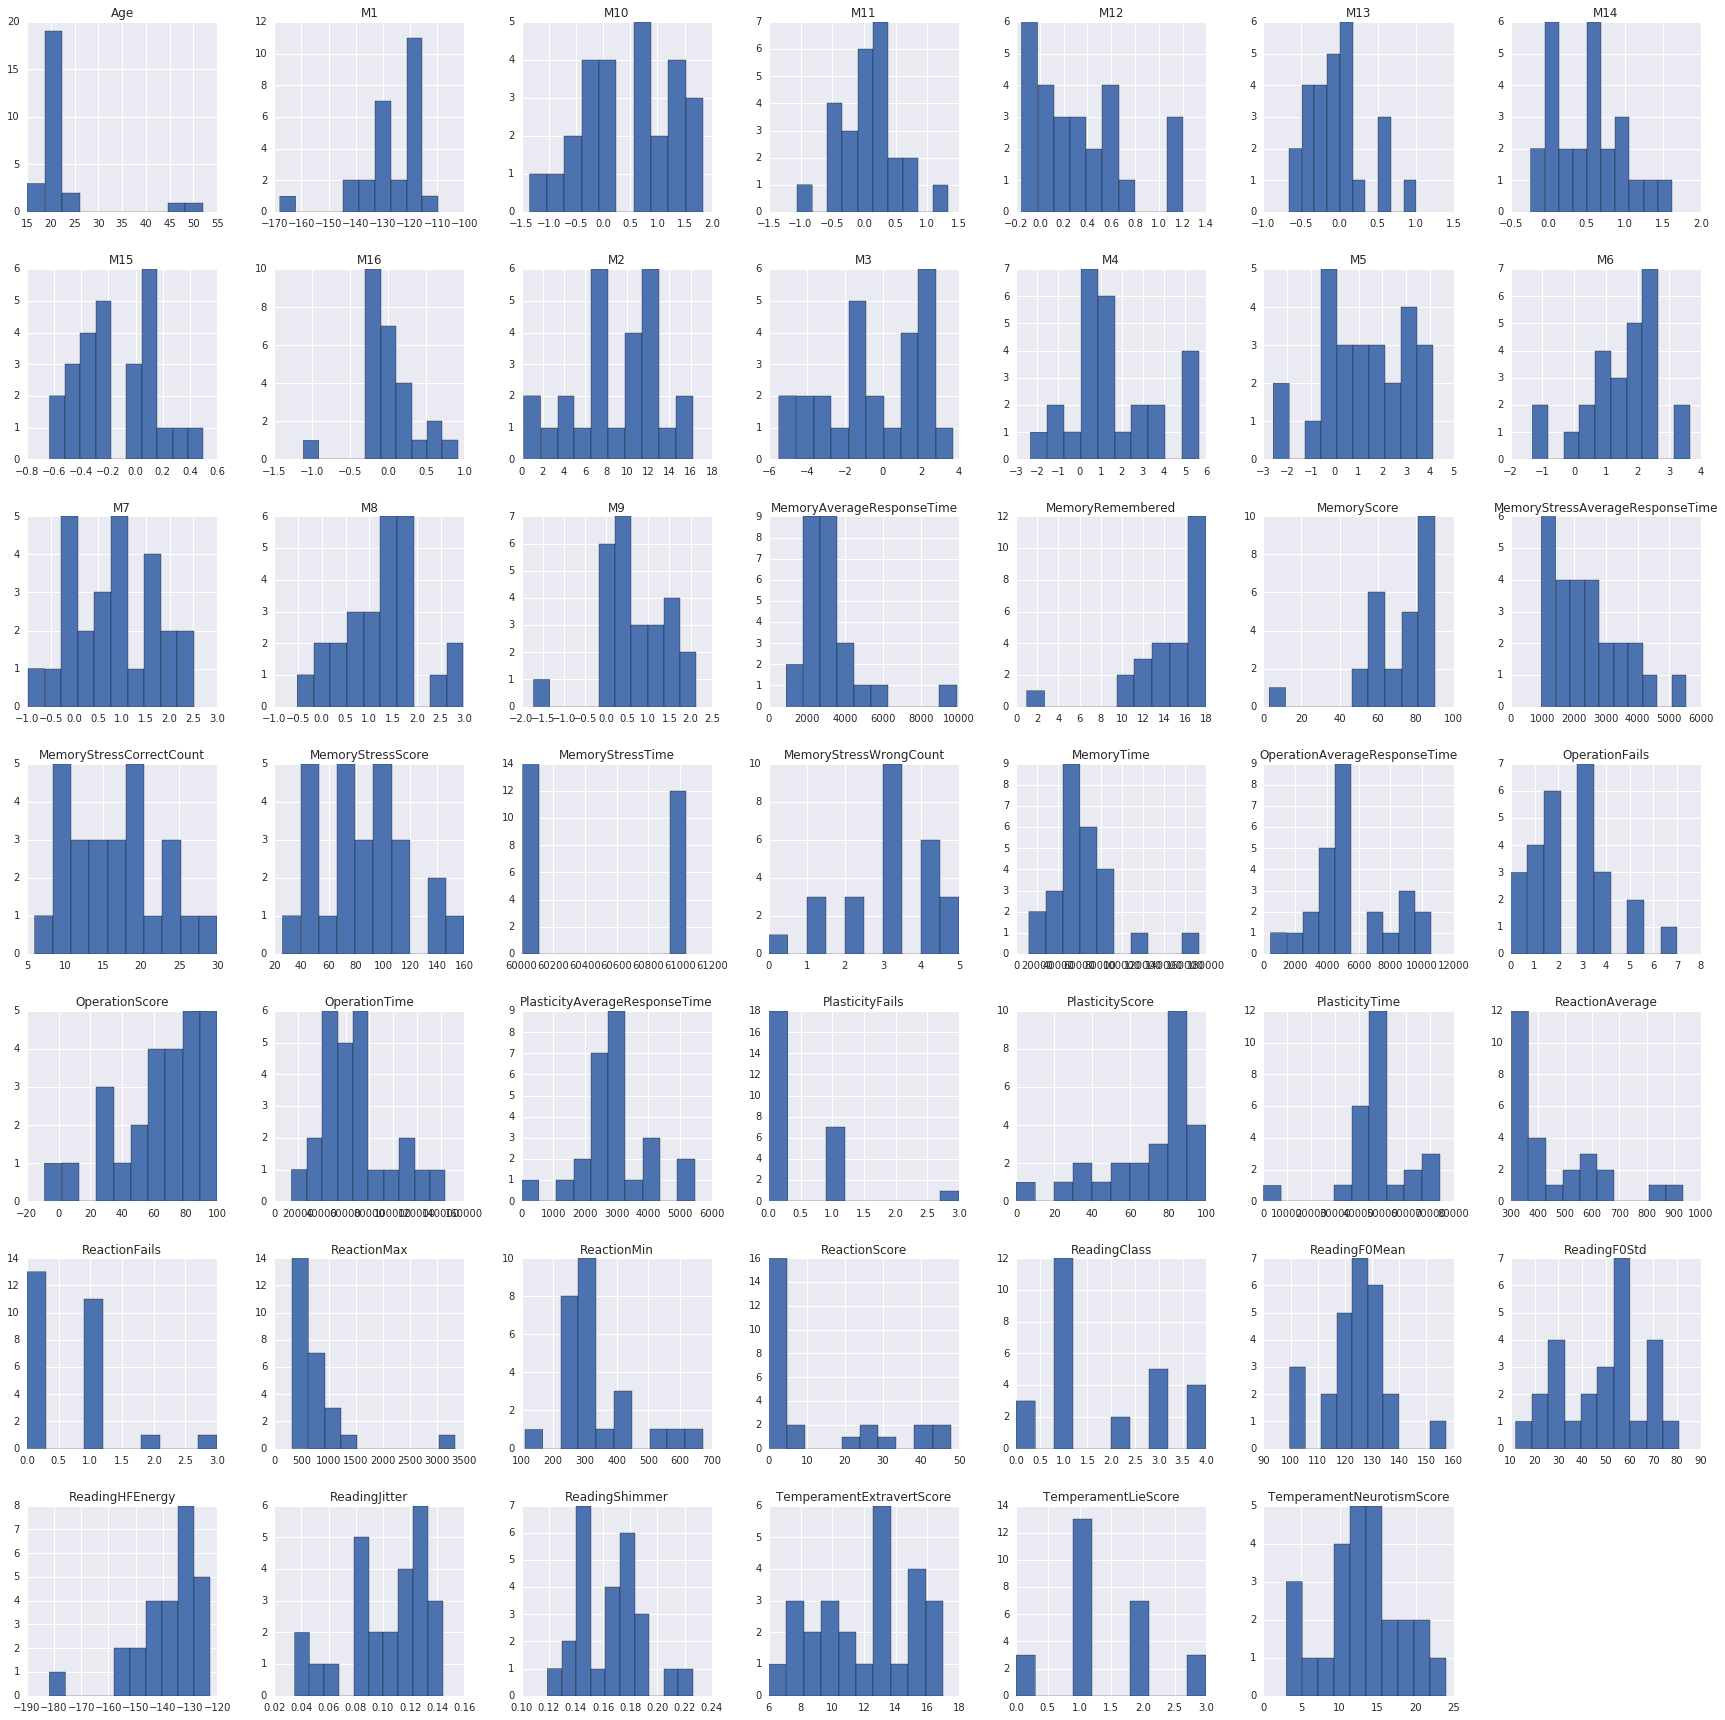

In [13]:
results.hist(figsize=(30,30))
plt.savefig('figures/results_hist.png')

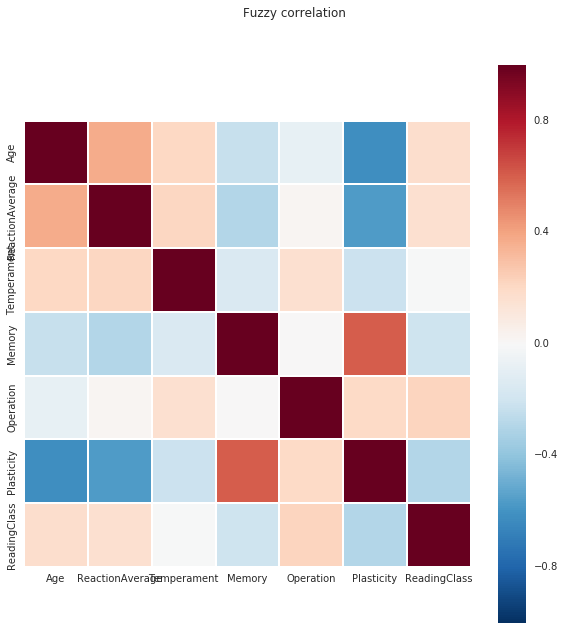

In [24]:
fuzzy  = pd.read_csv("fuzzy/fuzzy_results.csv", index_col=0)
fuzzy.corr().to_csv('fuzzy/fuzzy_correlation.csv')
#fuzzy = fuzzy.dropna()[['ReadingF0Mean','ReadingF0Std','ReadingJitter','ReadingShimmer','ReadingHFEnergy','Age','ReactionAverage','Temperament','Memory','Operation','Plasticity','ReadingClass']]
fuzzy = fuzzy.dropna()[['Age','ReactionAverage','Temperament','Memory','Operation','Plasticity','ReadingClass']]

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(fuzzy.corr(), ax=ax, square=True, linewidths=1)
plt.gcf().suptitle('Fuzzy correlation')
plt.savefig('figures/fuzzy_correlation.png')